In [1]:
# 필요한 라이브러리 임포트
from binance.client import Client
from binance.enums import *
import pandas as pd
from datetime import datetime , timedelta
import time

import pandas as pd
import numpy as np
import torch
import pyarrow

In [2]:
"""
컬럼        이름	    의 미	                    설명
tavg	평균기온 (Average Temperature)	하루 동안의 평균 기온 (°C)
tmin	최저기온 (Minimum Temperature)	하루 중 가장 낮은 기온 (°C)
tmax	최고기온 (Maximum Temperature)	하루 중 가장 높은 기온 (°C)
prcp	강수량 (Precipitation)	하루 동안 내린 비/눈의 총량 (mm)
snow	적설량 (Snowfall)	하루 동안 쌓인 눈의 양 (cm 또는 mm)
wdir	풍향 (Wind Direction)	바람이 불어오는 방향 (도, 0~360°, 북쪽 기준 시계방향)
wspd	평균 풍속 (Wind Speed)	하루 평균 풍속 (m/s 또는 km/h)
wpgt	최대 순간 풍속 (Wind Gust)	하루 중 기록된 가장 강한 순간 바람 (m/s 또는 km/h)
pres	평균 기압 (Pressure)	해면기준 평균 기압 (hPa)
tsun	일조시간 (Sunshine Duration)	하루 동안 태양이 비친 총 시간 (minutes 또는 hours)

"""

'\n컬럼        이름\t    의 미\t                    설명\ntavg\t평균기온 (Average Temperature)\t하루 동안의 평균 기온 (°C)\ntmin\t최저기온 (Minimum Temperature)\t하루 중 가장 낮은 기온 (°C)\ntmax\t최고기온 (Maximum Temperature)\t하루 중 가장 높은 기온 (°C)\nprcp\t강수량 (Precipitation)\t하루 동안 내린 비/눈의 총량 (mm)\nsnow\t적설량 (Snowfall)\t하루 동안 쌓인 눈의 양 (cm 또는 mm)\nwdir\t풍향 (Wind Direction)\t바람이 불어오는 방향 (도, 0~360°, 북쪽 기준 시계방향)\nwspd\t평균 풍속 (Wind Speed)\t하루 평균 풍속 (m/s 또는 km/h)\nwpgt\t최대 순간 풍속 (Wind Gust)\t하루 중 기록된 가장 강한 순간 바람 (m/s 또는 km/h)\npres\t평균 기압 (Pressure)\t해면기준 평균 기압 (hPa)\ntsun\t일조시간 (Sunshine Duration)\t하루 동안 태양이 비친 총 시간 (minutes 또는 hours)\n\n'

In [3]:
from meteostat import Point, Daily
from datetime import datetime

# 서울 (위도, 경도, 고도)
seoul = Point(37.5665, 126.9780, 38)

start = datetime(2024, 1, 1)
end = datetime(2025, 3, 1)

data = Daily(seoul, start, end)
data = data.fetch()

seoul_df = data.copy()

In [4]:
seoul_df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2024-01-01,4.3,-0.0,7.6,0.0,10.0,62.0,6.0,NaN,1027.0,NaN
2024-01-02,3.1,2.5,4.4,0.2,NaN,291.0,5.1,NaN,1022.4,NaN
2024-01-03,0.7,-0.2,4.1,0.8,NaN,297.0,5.7,NaN,1019.1,NaN
2024-01-04,3.6,-3.0,5.7,0.0,NaN,96.0,6.8,NaN,1021.9,NaN
2024-01-05,3.6,2.3,9.3,0.8,NaN,263.0,8.4,NaN,1019.6,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-02-25,3.9,-2.8,5.9,0.0,NaN,229.0,10.1,NaN,1026.6,NaN
2025-02-26,3.0,1.4,8.7,0.0,NaN,266.0,9.1,NaN,1023.5,NaN
2025-02-27,7.6,-1.7,14.3,0.0,NaN,320.0,6.8,NaN,1021.8,NaN


In [5]:
import pandas as pd
from meteostat import Point, Daily
from datetime import datetime

# 대한민국 시도별 위도/경도/고도 정보
korea_region_geo = {
    "서울특별시":      {"lat": 37.5665, "lon": 126.9780, "alt": 38},
    "부산광역시":      {"lat": 35.1796, "lon": 129.0756, "alt": 5},
    "대구광역시":      {"lat": 35.8714, "lon": 128.6014, "alt": 70},
    "인천광역시":      {"lat": 37.4563, "lon": 126.7052, "alt": 2},
    "광주광역시":      {"lat": 35.1595, "lon": 126.8526, "alt": 50},
    "대전광역시":      {"lat": 36.3504, "lon": 127.3845, "alt": 70},
    "울산광역시":      {"lat": 35.5384, "lon": 129.3114, "alt": 30},
    "세종특별자치시":   {"lat": 36.4800, "lon": 127.2890, "alt": 70},
    "경기도":         {"lat": 37.4138, "lon": 127.5183, "alt": 50},
    "강원도":         {"lat": 37.8228, "lon": 128.1555, "alt": 250},
    "충청북도":       {"lat": 36.6358, "lon": 127.4917, "alt": 100},
    "충청남도":       {"lat": 36.5184, "lon": 126.8000, "alt": 50},
    "전라북도":       {"lat": 35.7167, "lon": 127.1440, "alt": 40},
    "전라남도":       {"lat": 34.8161, "lon": 126.4629, "alt": 30},
    "경상북도":       {"lat": 36.4919, "lon": 128.8889, "alt": 100},
    "경상남도":       {"lat": 35.4606, "lon": 128.2132, "alt": 50},
    "제주특별자치도":   {"lat": 33.4996, "lon": 126.5312, "alt": 20}
}

class BTC():
    def __init__(self):
        self.df = None
        self.weather = {}  # 지역별 날씨 DataFrame 저장

    def Get_btc(self, path):
        df = pd.read_csv(path, index_col=0)
        self.df = df.copy()

    def Get_weather(self, start_date='2024-01-01', end_date='2024-01-31'):
        """
        meteostat 라이브러리를 사용하여 시도별 일별 날씨 데이터를 self.weather에 저장
        """
        start = datetime.strptime(start_date, "%Y-%m-%d")
        end = datetime.strptime(end_date, "%Y-%m-%d")

        for region, info in korea_region_geo.items():
            print(f"Fetching weather data for: {region}")
            point = Point(info["lat"], info["lon"], info["alt"])
            data = Daily(point, start, end).fetch()
            self.weather[region] = data

In [6]:
btc_obj = BTC()
btc_obj.Get_btc('/home/cksgh8511/키움/upbit/BTCSPOT.csv')
btc_obj.Get_weather(start_date='2024-01-01', end_date='2025-04-1')

# 예시: 서울 날씨 확인
print(btc_obj.weather["서울특별시"].head())

Fetching weather data for: 서울특별시
Fetching weather data for: 부산광역시
Fetching weather data for: 대구광역시
Fetching weather data for: 인천광역시
Fetching weather data for: 광주광역시
Fetching weather data for: 대전광역시
Fetching weather data for: 울산광역시
Fetching weather data for: 세종특별자치시
Fetching weather data for: 경기도
Fetching weather data for: 강원도
Fetching weather data for: 충청북도
Fetching weather data for: 충청남도
Fetching weather data for: 전라북도
Fetching weather data for: 전라남도
Fetching weather data for: 경상북도
Fetching weather data for: 경상남도
Fetching weather data for: 제주특별자치도
            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-01-01   4.3  -0.0   7.6   0.0  10.0   62.0   6.0   NaN  1027.0   NaN
2024-01-02   3.1   2.5   4.4   0.2   NaN  291.0   5.1   NaN  1022.4   NaN
2024-01-03   0.7  -0.2   4.1   0.8   NaN  297.0   5.7   NaN  1019.1   NaN
2024-01-04   3.6  -3.0   5.7   0.0   NaN   96.0   6.8   NaN  1021.9   NaN
2

In [7]:
print(btc_obj.weather["서울특별시"])

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2024-01-01   4.3  -0.0   7.6   0.0  10.0   62.0   6.0   NaN  1027.0   NaN
2024-01-02   3.1   2.5   4.4   0.2   NaN  291.0   5.1   NaN  1022.4   NaN
2024-01-03   0.7  -0.2   4.1   0.8   NaN  297.0   5.7   NaN  1019.1   NaN
2024-01-04   3.6  -3.0   5.7   0.0   NaN   96.0   6.8   NaN  1021.9   NaN
2024-01-05   3.6   2.3   9.3   0.8   NaN  263.0   8.4   NaN  1019.6   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2025-03-28   5.5   3.7  11.8   0.1   NaN  292.0  13.7   NaN  1013.1   NaN
2025-03-29   2.9   1.2   6.8   0.4   NaN  275.0  12.2   NaN  1021.5   NaN
2025-03-30   4.5  -1.5   7.7   0.3   NaN  255.0  10.6   NaN  1027.4   NaN
2025-03-31   8.7   1.5  14.0   0.0   NaN  263.0   7.9   NaN  1025.0   NaN
2025-04-01  10.6   4.2  17.1   0.0   NaN  306.0   6.5   NaN  1022.1   NaN

[457 rows x 10 columns]


In [8]:
class BTCFeatures(BTC):
    def __init__(self):
        super().__init__()  # BTC 클래스의 df, weather 초기화
    def calc_discomfort_index(self, temp_c, humidity):
        """불쾌지수 계산 공식"""
        return 0.81 * temp_c + 0.01 * humidity * (0.99 * temp_c - 14.3) + 46.3

    def calc_apparent_temp(self, temp_c, wind_speed):
        """체감온도 (기온 <= 10도 조건 포함)"""
        if temp_c <= 10 and wind_speed >= 1.3:
            return 13.12 + 0.6215 * temp_c - 11.37 * wind_speed**0.16 + 0.3965 * temp_c * wind_speed**0.16
        else:
            return temp_c
    def engineer_weather_features(self):
        """self.weather 내 각 지역 데이터에 불쾌지수 및 체감온도 컬럼 추가"""
        for region, df in self.weather.items():
            df = df.copy()

            if 'tavg' in df.columns and 'wspd' in df.columns:
                df['apparent_temp'] = df.apply(lambda row: self.calc_apparent_temp(row['tavg'], row['wspd']), axis=1)

            if 'tavg' in df.columns and 'rhum' in df.columns:
                df['discomfort_index'] = df.apply(lambda row: self.calc_discomfort_index(row['tavg'], row['rhum']), axis=1)
            
            # 다시 저장
            self.weather[region] = df

In [9]:
btc_feat = BTCFeatures()
btc_feat.Get_btc('/home/cksgh8511/키움/upbit/BTCSPOT.csv')
btc_feat.Get_weather(start_date='2024-01-01', end_date='2025-04-23')
btc_feat.engineer_weather_features()

# 서울 날씨 파생 피처 확인



Fetching weather data for: 서울특별시
Fetching weather data for: 부산광역시
Fetching weather data for: 대구광역시
Fetching weather data for: 인천광역시
Fetching weather data for: 광주광역시
Fetching weather data for: 대전광역시
Fetching weather data for: 울산광역시
Fetching weather data for: 세종특별자치시
Fetching weather data for: 경기도
Fetching weather data for: 강원도
Fetching weather data for: 충청북도
Fetching weather data for: 충청남도
Fetching weather data for: 전라북도
Fetching weather data for: 전라남도
Fetching weather data for: 경상북도
Fetching weather data for: 경상남도
Fetching weather data for: 제주특별자치도


In [10]:
btc_feat.weather["서울특별시"]

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,apparent_temp
time,,,,,,,,,,,
2024-01-01,4.3,-0.0,7.6,0.0,10.0,62.0,6.0,NaN,1027.0,NaN,2.918604
2024-01-02,3.1,2.5,4.4,0.2,NaN,291.0,5.1,NaN,1022.4,NaN,1.885750
2024-01-03,0.7,-0.2,4.1,0.8,NaN,297.0,5.7,NaN,1019.1,NaN,-1.099330
2024-01-04,3.6,-3.0,5.7,0.0,NaN,96.0,6.8,NaN,1021.9,NaN,1.845968
2024-01-05,3.6,2.3,9.3,0.8,NaN,263.0,8.4,NaN,1019.6,NaN,1.381343
...,...,...,...,...,...,...,...,...,...,...,...
2025-04-19,14.7,12.4,17.5,NaN,NaN,119.0,8.6,NaN,1009.4,NaN,14.700000
2025-04-20,15.6,11.2,20.6,NaN,NaN,266.0,9.5,NaN,1010.2,NaN,15.600000
2025-04-21,17.4,12.5,22.9,NaN,NaN,112.0,8.4,NaN,1013.7,NaN,17.400000


In [11]:
import requests
import pandas as pd
from datetime import datetime
from meteostat import Point, Daily

# 시도별 위경도/고도 정보 (같이 포함)
korea_region_geo = {
    "서울특별시":      {"lat": 37.5665, "lon": 126.9780, "alt": 38},
    "부산광역시":      {"lat": 35.1796, "lon": 129.0756, "alt": 5},
    "대구광역시":      {"lat": 35.8714, "lon": 128.6014, "alt": 70},
    "인천광역시":      {"lat": 37.4563, "lon": 126.7052, "alt": 2},
    "광주광역시":      {"lat": 35.1595, "lon": 126.8526, "alt": 50},
    "대전광역시":      {"lat": 36.3504, "lon": 127.3845, "alt": 70},
    "울산광역시":      {"lat": 35.5384, "lon": 129.3114, "alt": 30},
    "세종특별자치시":   {"lat": 36.4800, "lon": 127.2890, "alt": 70},
    "경기도":         {"lat": 37.4138, "lon": 127.5183, "alt": 50},
    "강원도":         {"lat": 37.8228, "lon": 128.1555, "alt": 250},
    "충청북도":       {"lat": 36.6358, "lon": 127.4917, "alt": 100},
    "충청남도":       {"lat": 36.5184, "lon": 126.8000, "alt": 50},
    "전라북도":       {"lat": 35.7167, "lon": 127.1440, "alt": 40},
    "전라남도":       {"lat": 34.8161, "lon": 126.4629, "alt": 30},
    "경상북도":       {"lat": 36.4919, "lon": 128.8889, "alt": 100},
    "경상남도":       {"lat": 35.4606, "lon": 128.2132, "alt": 50},
    "제주특별자치도":   {"lat": 33.4996, "lon": 126.5312, "alt": 20}
}

class BTC:
    def __init__(self):
        self.df = None
        self.weather = {}

    def Get_btc(self, path):
        df = pd.read_csv(path, index_col=0)
        df.index = pd.to_datetime(df['timestamp'])  # ✅ 여기서 datetime 인덱스 보장
        self.df = df.copy()

    def Get_weather(self, start_date='2024-01-01', end_date='2024-01-31'):
        start = datetime.strptime(start_date, "%Y-%m-%d")
        end = datetime.strptime(end_date, "%Y-%m-%d")
        for region, info in korea_region_geo.items():
            print(f"Fetching weather (meteostat) for: {region}")
            point = Point(info["lat"], info["lon"], info["alt"])
            data = Daily(point, start, end).fetch()
            self.weather[region] = data

class BTCFeatures(BTC):
    def __init__(self):
        super().__init__()

    def calc_discomfort_index(self, temp_c, humidity):
        return 0.81 * temp_c + 0.01 * humidity * (0.99 * temp_c - 14.3) + 46.3

    def calc_apparent_temp(self, temp_c, wind_speed):
        if pd.isna(temp_c) or pd.isna(wind_speed):
            return None
        if temp_c <= 10 and wind_speed >= 1.3:
            return 13.12 + 0.6215 * temp_c - 11.37 * wind_speed**0.16 + 0.3965 * temp_c * wind_speed**0.16
        else:
            return temp_c

    def fetch_humidity_open_meteo(self, region, lat, lon, start_date, end_date):
        url = (
            "https://archive-api.open-meteo.com/v1/archive?"
            f"latitude={lat}&longitude={lon}"
            f"&start_date={start_date}&end_date={end_date}"
            f"&daily=relative_humidity_2m_mean"
            f"&timezone=Asia%2FSeoul"
        )
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            df = pd.DataFrame({
                "time": data["daily"]["time"],
                "rhum": data["daily"]["relative_humidity_2m_mean"]
            })
            df["time"] = pd.to_datetime(df["time"])
            df.set_index("time", inplace=True)
            return df
        else:
            print(f"Failed to fetch humidity for {region} - status: {response.status_code}")
            return pd.DataFrame()

    def engineer_weather_features(self, start_date="2024-01-01", end_date="2024-01-31"):
        for region, df in self.weather.items():
            df = df.copy()
            info = korea_region_geo[region]

            # 상대습도 가져오기
            rhum_df = self.fetch_humidity_open_meteo(region, info["lat"], info["lon"], start_date, end_date)
            df = df.merge(rhum_df, left_index=True, right_index=True, how="left")

            # 체감온도
            if 'tavg' in df.columns and 'wspd' in df.columns:
                df['apparent_temp'] = df.apply(
                    lambda row: self.calc_apparent_temp(row['tavg'], row['wspd']), axis=1
                )

            # 불쾌지수
            if 'tavg' in df.columns and 'rhum' in df.columns:
                df['discomfort_index'] = df.apply(
                    lambda row: self.calc_discomfort_index(row['tavg'], row['rhum']), axis=1
                )

            self.weather[region] = df


In [12]:
btc_feat = BTCFeatures()
btc_feat.Get_btc('/home/cksgh8511/키움/upbit/BTCSPOT.csv')
btc_feat.Get_weather(start_date='2024-01-01', end_date='2025-04-23')
btc_feat.engineer_weather_features(start_date='2024-01-01', end_date='2025-04-23')

# 불쾌지수, 체감온도 포함된 서울 날씨
btc_feat.weather['서울특별시'][['tavg', 'wspd', 'rhum', 'apparent_temp', 'discomfort_index']].head()


Fetching weather (meteostat) for: 서울특별시
Fetching weather (meteostat) for: 부산광역시
Fetching weather (meteostat) for: 대구광역시
Fetching weather (meteostat) for: 인천광역시
Fetching weather (meteostat) for: 광주광역시
Fetching weather (meteostat) for: 대전광역시
Fetching weather (meteostat) for: 울산광역시
Fetching weather (meteostat) for: 세종특별자치시
Fetching weather (meteostat) for: 경기도
Fetching weather (meteostat) for: 강원도
Fetching weather (meteostat) for: 충청북도
Fetching weather (meteostat) for: 충청남도
Fetching weather (meteostat) for: 전라북도
Fetching weather (meteostat) for: 전라남도
Fetching weather (meteostat) for: 경상북도
Fetching weather (meteostat) for: 경상남도
Fetching weather (meteostat) for: 제주특별자치도


,tavg,wspd,rhum,apparent_temp,discomfort_index
time,,,,,
2024-01-01,4.3,6.0,85.0,2.918604,41.24645
2024-01-02,3.1,5.1,83.0,1.885750,39.48927
2024-01-03,0.7,5.7,87.0,-1.099330,35.02891
2024-01-04,3.6,6.8,78.0,1.845968,40.84192
2024-01-05,3.6,8.4,84.0,1.381343,40.19776


In [13]:
btc_feat.df

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2017-08-17,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2025-04-20,2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250
2025-04-21,2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620
2025-04-22,2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050


In [14]:
print(btc_feat.weather['서울특별시'].snow.sum())
print(btc_feat.weather['서울특별시'].snow.isna().sum())

2451.0
439


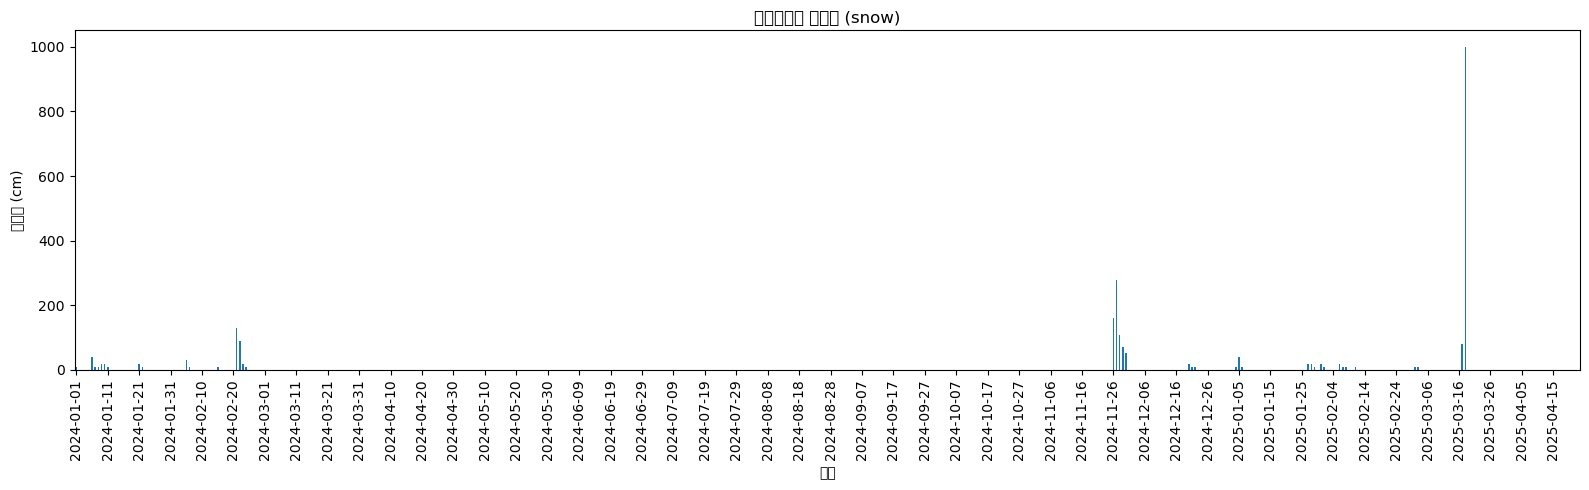

In [15]:
import matplotlib.pyplot as plt

# 데이터 준비
snow_series = btc_feat.weather['서울특별시']['snow']

# bar chart 생성
ax = snow_series.plot(kind='bar', figsize=(16, 5))

# 눈금 간격 설정 (예: 5일 간격)
tick_interval = 10
xticks = range(0, len(snow_series), tick_interval)
xticklabels = snow_series.index.strftime('%Y-%m-%d')[::tick_interval]

# x축 설정
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=90)

# 라벨 및 제목
plt.title("서울특별시 적설량 (snow)")
plt.ylabel("적설량 (cm)")
plt.xlabel("날짜")
plt.tight_layout()
plt.show()

In [16]:
'''
[서울특별시,
부산광역시,
대구광역시,
인천광역시,
광주광역시,
대전광역시,
울산광역시,
세종특별자치시,
경기도,
강원도,
충청북도,
충청남도,
전라북도,
전라남도,
경상북도,
경상남도,
제주특별자치도]
'''

'\n[서울특별시,\n부산광역시,\n대구광역시,\n인천광역시,\n광주광역시,\n대전광역시,\n울산광역시,\n세종특별자치시,\n경기도,\n강원도,\n충청북도,\n충청남도,\n전라북도,\n전라남도,\n경상북도,\n경상남도,\n제주특별자치도]\n'

In [17]:
지역 = ['서울특별시',
'부산광역시',
'대구광역시',
'인천광역시',
'광주광역시',
'대전광역시',
'울산광역시',
'세종특별자치시',
'경기도',
'강원도',
'충청북도',
'충청남도',
'전라북도',
'전라남도',
'경상북도',
'경상남도',
'제주특별자치도']

In [18]:
# 불쾌지수, 체감온도 포함된 서울 날씨
for region in 지역:
    print(region)
    print(btc_feat.weather[region][['tavg', 'wspd', 'rhum', 'apparent_temp', 'discomfort_index']].head())

서울특별시
            tavg  wspd  rhum  apparent_temp  discomfort_index
time                                                         
2024-01-01   4.3   6.0  85.0       2.918604          41.24645
2024-01-02   3.1   5.1  83.0       1.885750          39.48927
2024-01-03   0.7   5.7  87.0      -1.099330          35.02891
2024-01-04   3.6   6.8  78.0       1.845968          40.84192
2024-01-05   3.6   8.4  84.0       1.381343          40.19776
부산광역시
            tavg  wspd  rhum  apparent_temp  discomfort_index
time                                                         
2024-01-01   7.2   9.4  76.0       5.407842          46.68128
2024-01-02   8.4   8.4  78.0       7.039823          48.43648
2024-01-03   5.8  12.1  75.0       3.208105          44.57950
2024-01-04   5.0  11.1  69.0       2.429961          43.89850
2024-01-05   8.4  18.5  78.0       5.518147          48.43648
대구광역시
            tavg  wspd  rhum  apparent_temp  discomfort_index
time                                                

In [19]:
btc_feat.df

,timestamp,open,high,low,close,volume
timestamp,,,,,,
2017-08-17,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
...,...,...,...,...,...,...
2025-04-20,2025-04-20,85077.00,85320.76,83949.52,85179.24,8091.677250
2025-04-21,2025-04-21,85179.24,88465.99,85144.76,87516.23,31773.372620
2025-04-22,2025-04-22,87516.22,93888.00,87076.03,93442.99,43872.747050


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class EDA:
    def __init__(self, btc_features_obj: BTCFeatures):
        self.btc_data = btc_features_obj.df
        self.weather_data = btc_features_obj.weather
    
    def plot_correlation_heatmap(self, region='서울특별시', price_col='close', dropna=True):
        """
        특정 지역의 날씨 + 비트코인 가격 파생 피처 간 상관관계 히트맵을 시각화

        Parameters:
            region (str)   : 분석할 시도명 (self.weather의 key)
            price_col (str): BTC 가격 컬럼명 ('close' or 'pct_change')
            dropna (bool)  : 결측 행 제거 여부
        """
        

        # 수익률(변화율) 계산
        for col in ['open', 'high', 'low', 'close']:
            self.btc_data[f'{col}_pct'] = self.btc_data[col].pct_change()

        self.btc_data['volume_pct'] = self.btc_data['volume'].pct_change()
        self.btc_data['pct_change'] = self.btc_data['close'].pct_change()

        weather_df = self.weather_data[region].copy()
        
        
        merged_df = pd.merge(self.btc_data, weather_df, left_index=True, right_index=True, how='inner')
        
        self.merged_df = merged_df.copy()
        cols = [
            'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'rhum',
            'apparent_temp', 'discomfort_index',
            'open_pct', 'high_pct', 'low_pct', 'close_pct', 'volume_pct','pct_change'
        ]
        

        df_corr = merged_df[cols].dropna()
        
        if df_corr.empty:
            print("⚠️ 유효한 데이터가 없어서 상관관계를 계산할 수 없습니다.")
            return False
        else:
            plt.figure(figsize=(12, 6))
            sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
            plt.title("Correlation")
            plt.tight_layout()
            plt.show()


        return df_corr  # 분석 용도로 반환도 가능

서울특별시


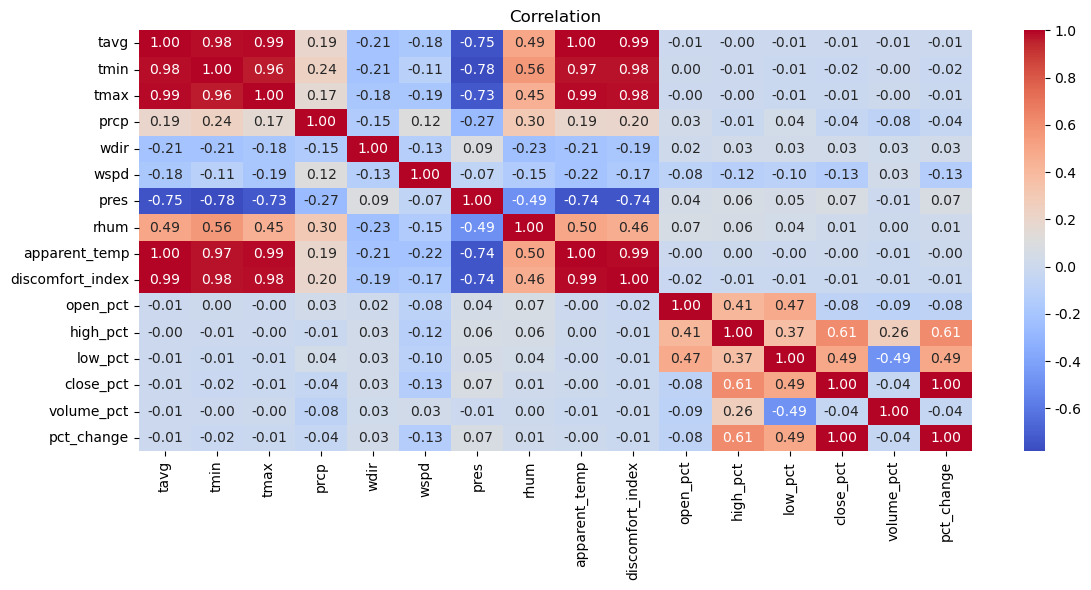

부산광역시


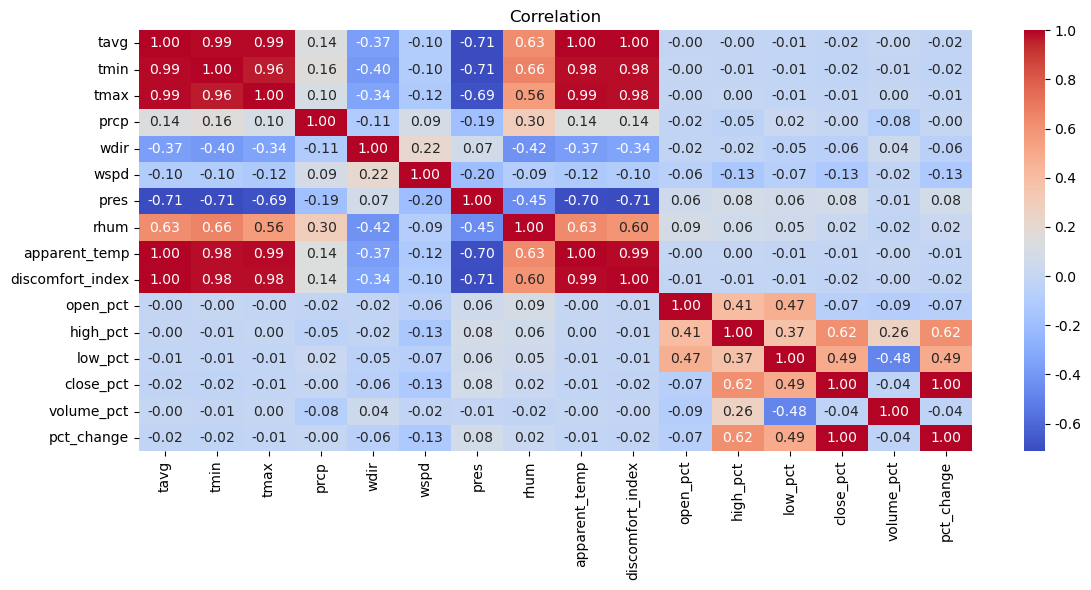

대구광역시


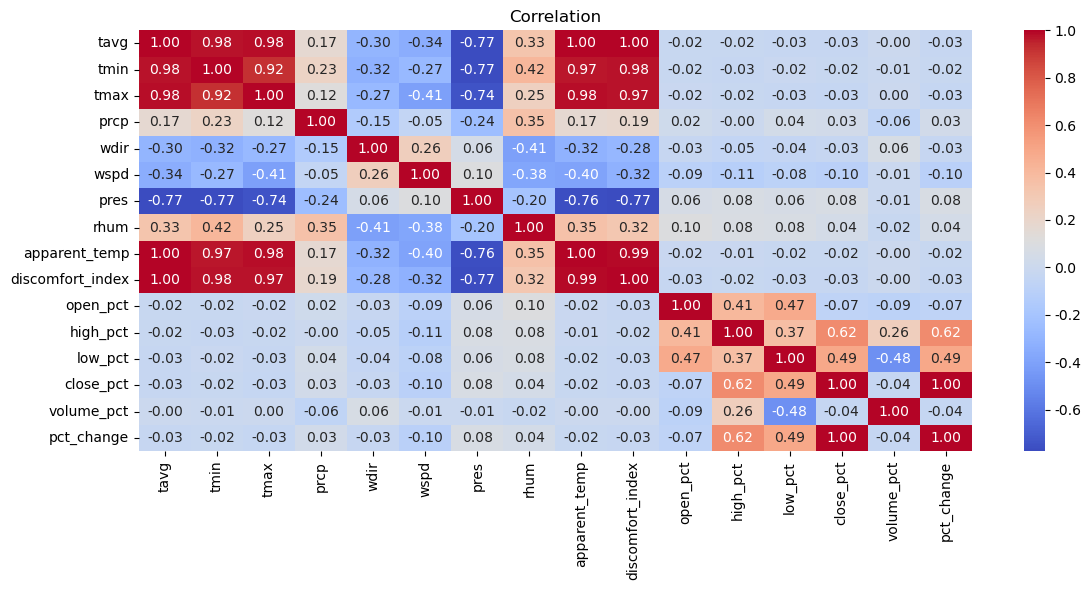

인천광역시


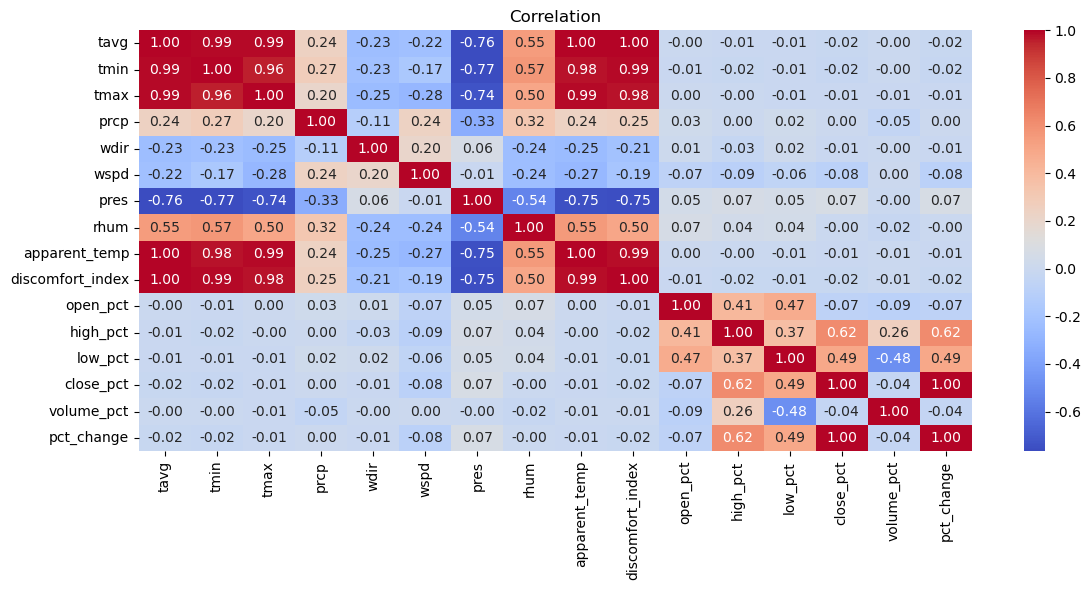

광주광역시


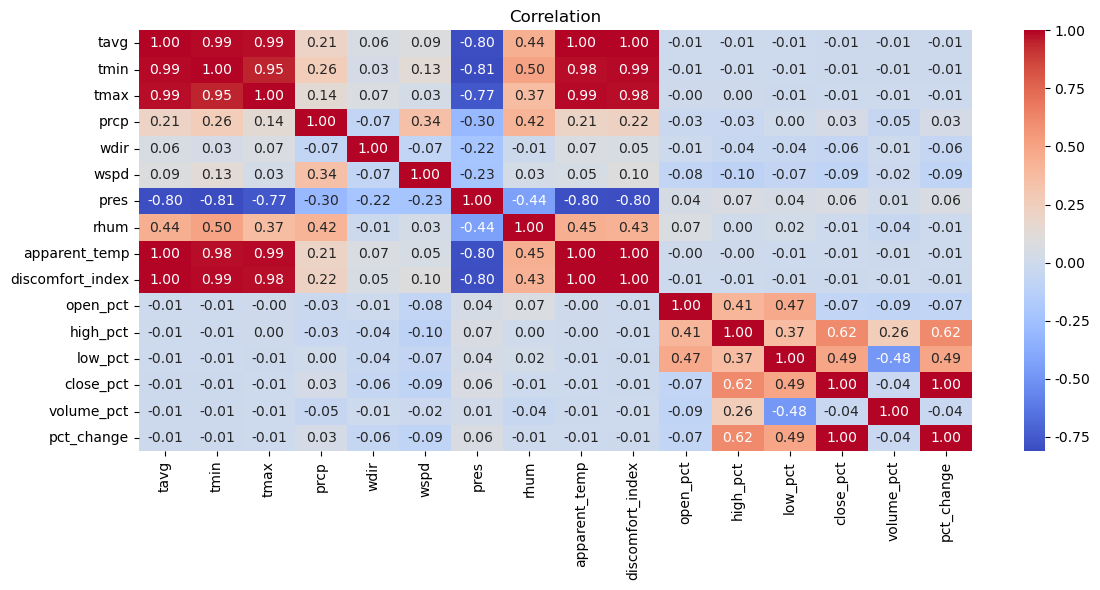

대전광역시


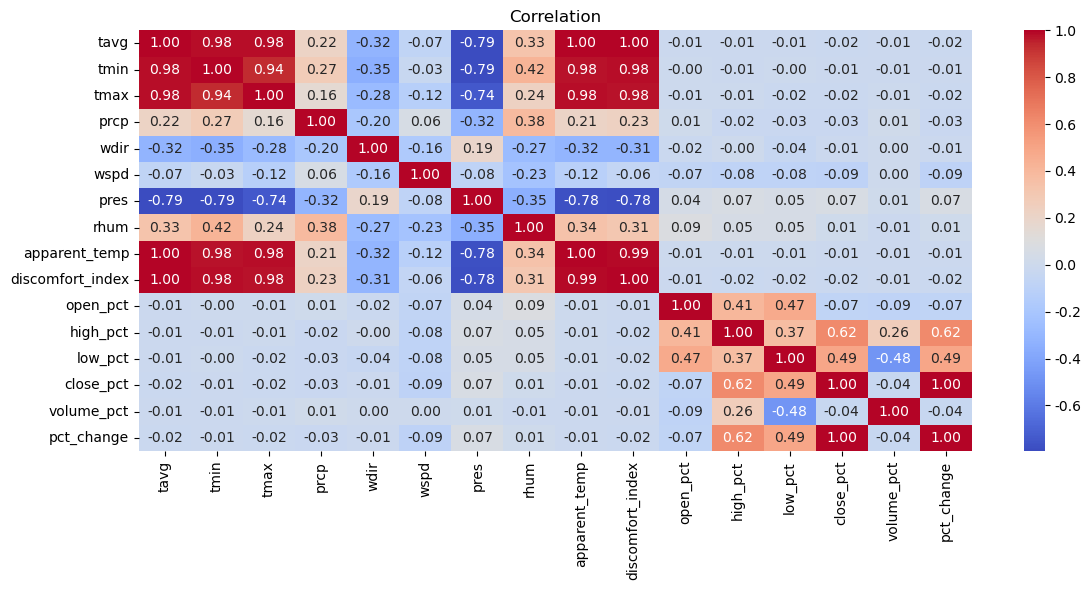

울산광역시


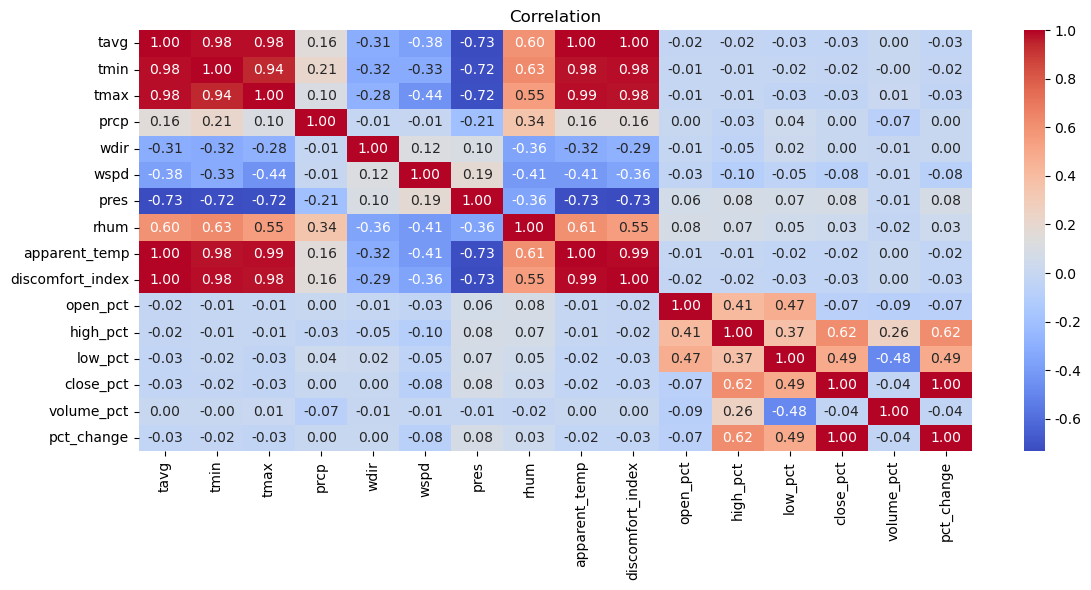

세종특별자치시


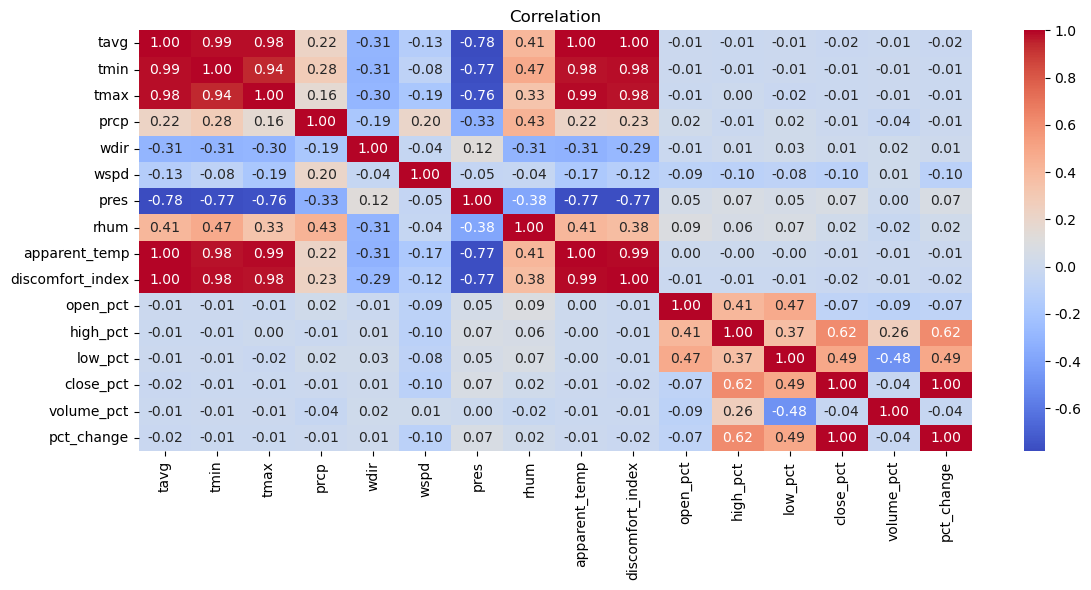

경기도


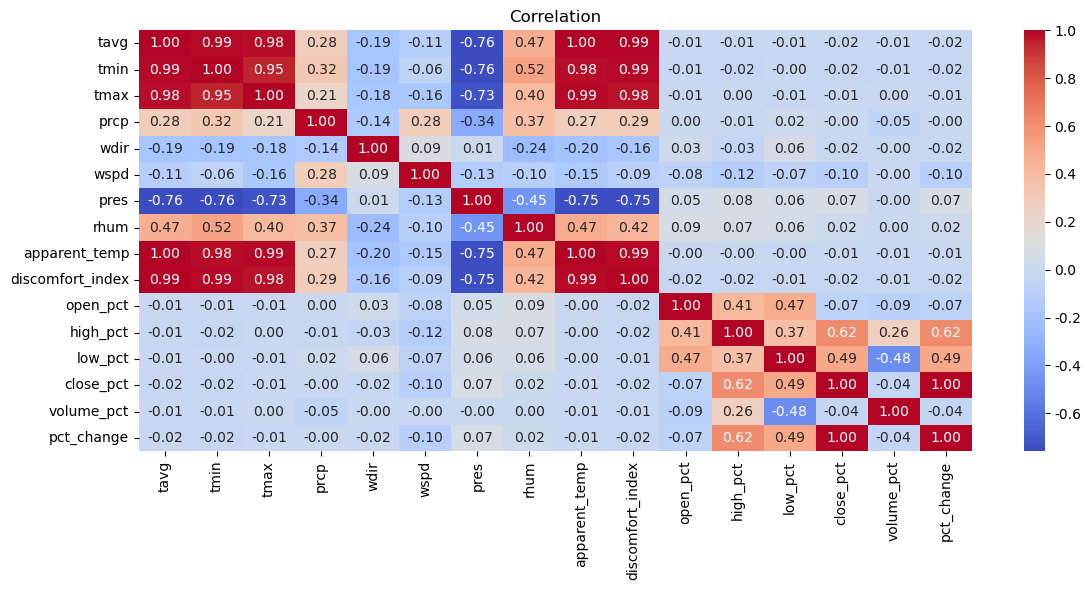

강원도


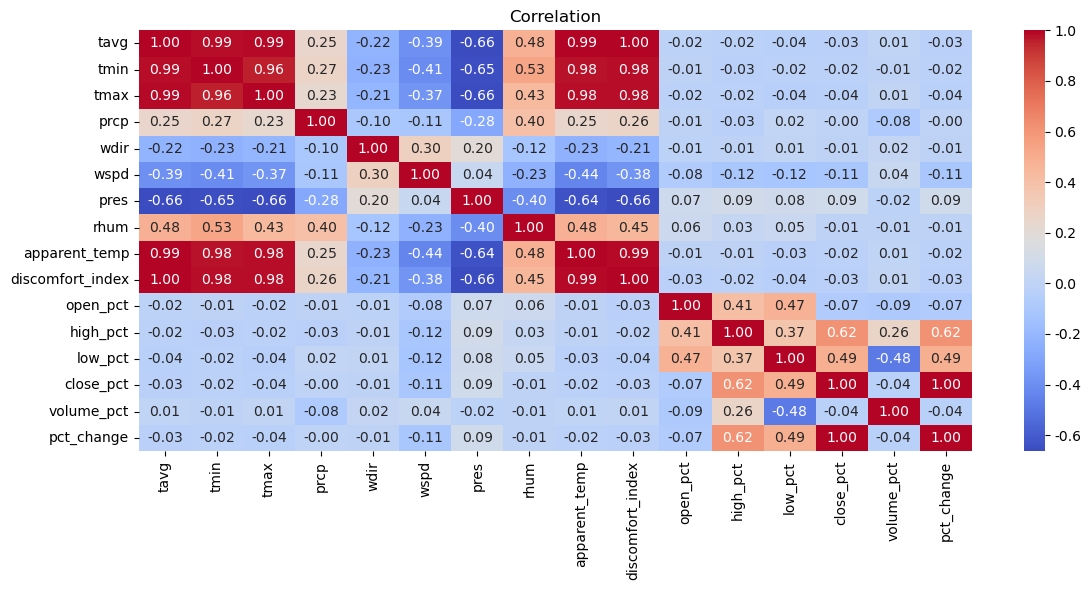

충청북도


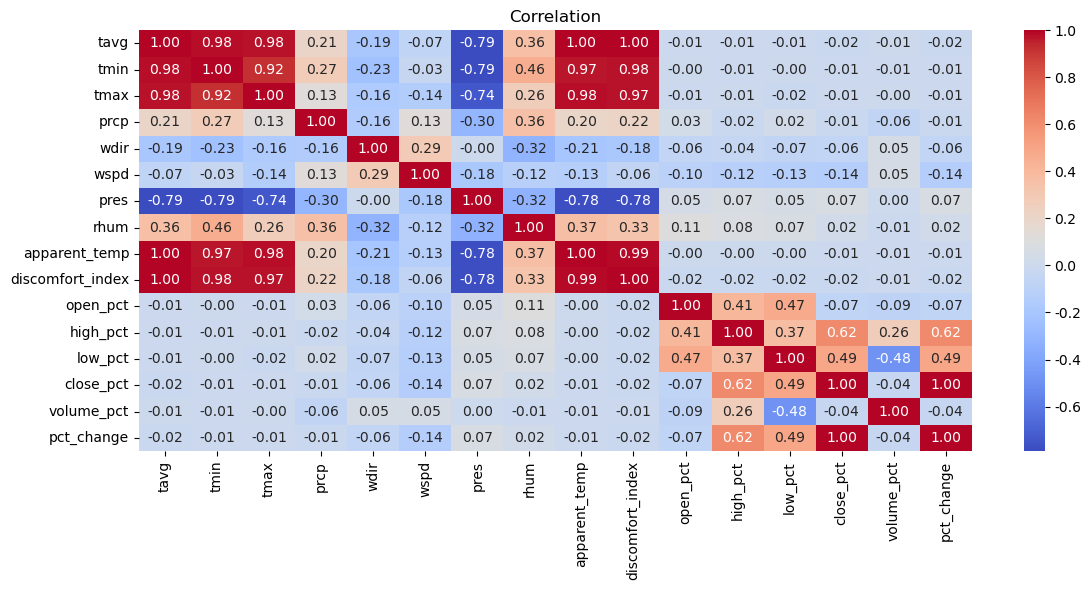

충청남도
⚠️ 유효한 데이터가 없어서 상관관계를 계산할 수 없습니다.
전라북도
⚠️ 유효한 데이터가 없어서 상관관계를 계산할 수 없습니다.
전라남도


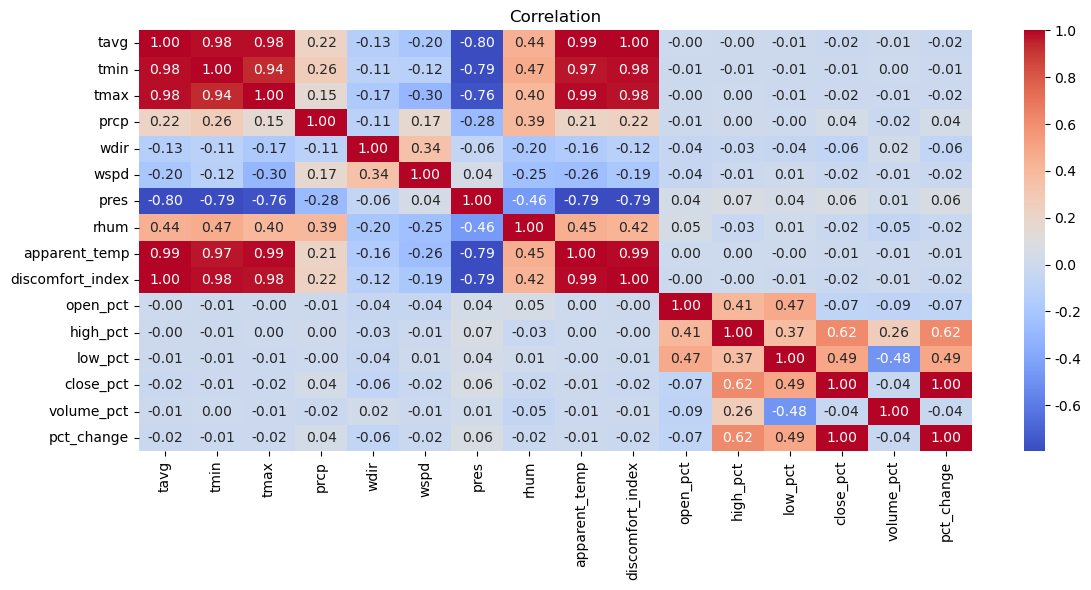

경상북도


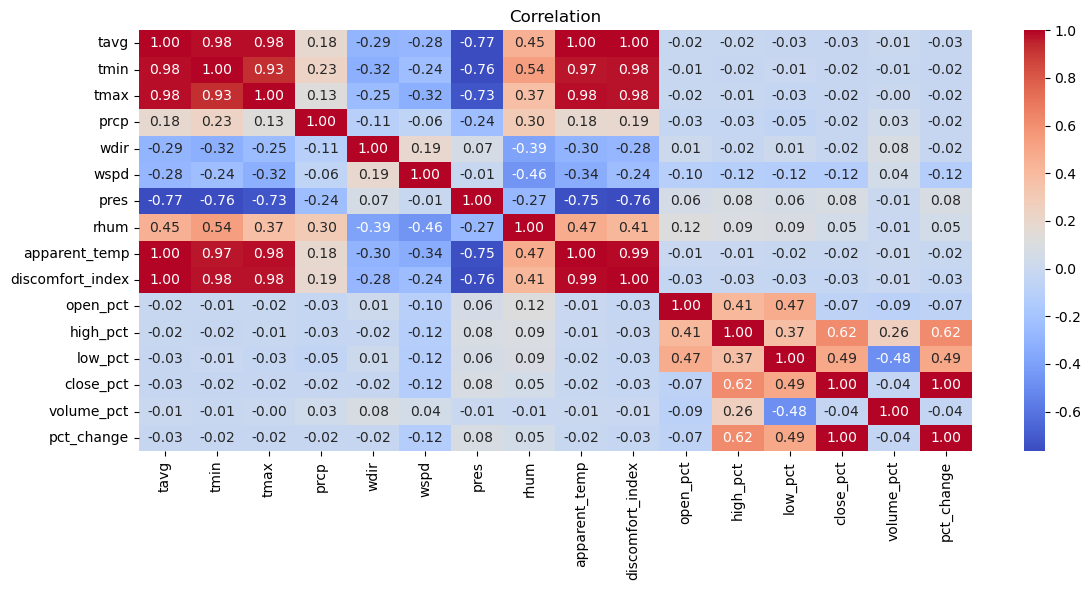

경상남도
⚠️ 유효한 데이터가 없어서 상관관계를 계산할 수 없습니다.
제주특별자치도


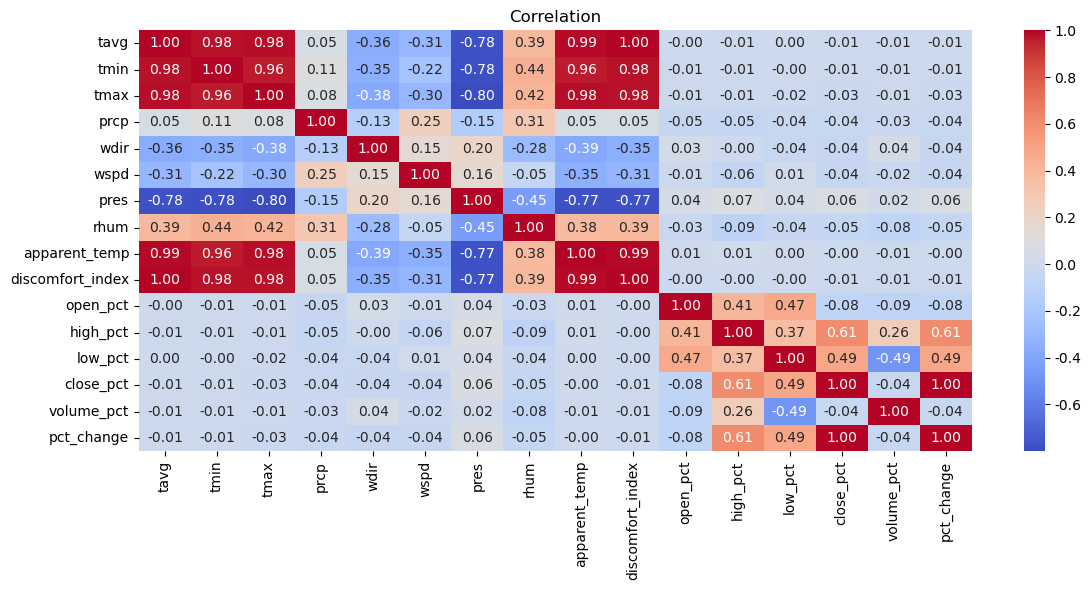

In [65]:
eda = EDA(btc_feat)

# 지역별 상관관계 출력
for region in 지역:
    print(region)
    corr_matrix = eda.plot_correlation_heatmap(region=region, price_col='pct_change')


<Axes: xlabel='timestamp'>

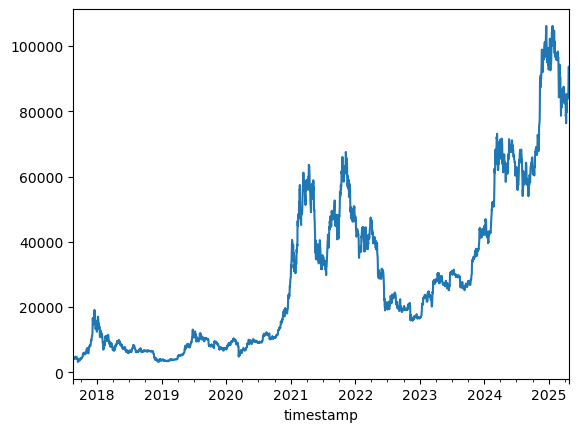

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'  # 기본 폰트로 복귀
eda.btc_data['close'].plot()

Text(0.5, 1.0, 'discomfort_level vs pct_change')

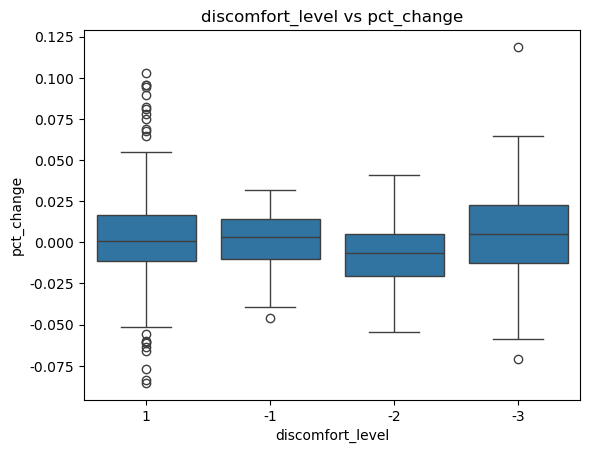

In [55]:
import matplotlib.font_manager as fm
eda.merged_df['discomfort_level'] = pd.cut(
    eda.merged_df['discomfort_index'],
    bins=[0, 68, 75, 80, 100],
    labels=['1', '-1', '-2', '-3']
)

sns.boxplot(data=eda.merged_df, x='discomfort_level', y='pct_change')
plt.title(f"discomfort_level vs pct_change")

Text(0.5, 1.0, 'discomfort_level vs pct_change')

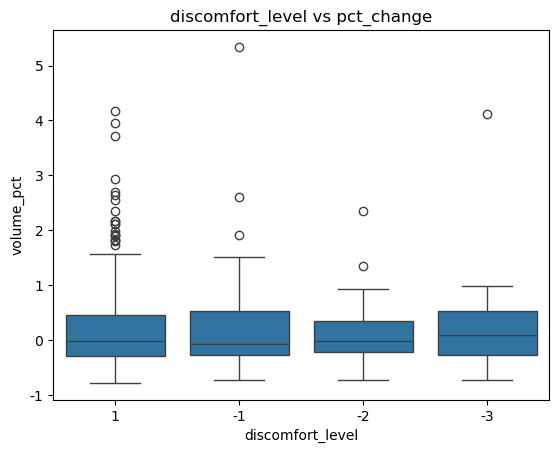

In [61]:
import matplotlib.font_manager as fm
eda.merged_df['discomfort_level'] = pd.cut(
    eda.merged_df['discomfort_index'],
    bins=[0, 68, 75, 80, 100],
    labels=['1', '-1', '-2', '-3']
)

sns.boxplot(data=eda.merged_df, x='discomfort_level', y='volume_pct')
plt.title(f"discomfort_level vs pct_change")